In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, RocCurveDisplay
from catboost import CatBoostClassifier

plt.style.use("dark_background")
%matplotlib inline

SEED = 42

In [3]:
data_path = "../data/heart_cleveland_upload.csv"
data = pd.read_csv(data_path)

In [4]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [5]:
cat_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]
num_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]
target = ["condition"]

In [6]:
X, y = data[cat_features + num_features], data[target]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED, shuffle=True)

In [81]:
params = {
    "random_seed": SEED,
    "iterations": 100,
    "learning_rate": 0.02,
    "depth": 2,
    "verbose": False,
    "cat_features": cat_features,
    "l2_leaf_reg": 2
}

model = CatBoostClassifier(**params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("All dataset ROC-AUC:", roc_auc_score(y, model.predict_proba(X)[:, 1]))
print("Test dataset ROC-AUC:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))

All dataset ROC-AUC: 0.9152144160583943
Test dataset ROC-AUC: 0.8727678571428572


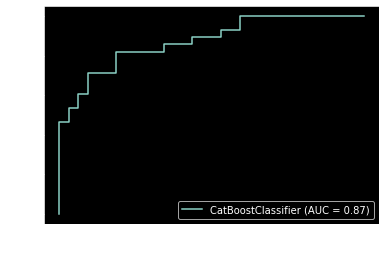

In [80]:
RocCurveDisplay.from_estimator(model, X_test, y_test)
plt.show()